# Chapter Seven - Data Processing with Optimus 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../../optimus")

In [3]:
from optimus import Optimus
op = Optimus("pandas")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LuisA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Handling Missing Values

In [4]:
df = op.create.dataframe({ 
    "A":[11,2,3,45,6,op.nan,2], 
    "B":[1,2,op.nan,45,6,2,3], 
    "C":[1,2,3,45,6,2,op.nan], 
    "D":[1,2,3,45,6,2,op.nan], 
    "E":[1,2,3,45,6,2,op.nan] 
}) 
df

A 1 (float64),B 2 (float64),C 3 (float64),D 4 (float64),E 5 (float64)
11.0,1.0,1.0,1.0,1.0
2.0,2.0,2.0,2.0,2.0
3.0,nan,3.0,3.0,3.0
45.0,45.0,45.0,45.0,45.0
6.0,6.0,6.0,6.0,6.0
nan,2.0,2.0,2.0,2.0
2.0,3.0,nan,nan,nan


### Removing Data

In [5]:
df.rows.drop_missings()

A 1 (float64),B 2 (float64),C 3 (float64),D 4 (float64),E 5 (float64)
11.0,1.0,1.0,1.0,1.0
2.0,2.0,2.0,2.0,2.0
45.0,45.0,45.0,45.0,45.0
6.0,6.0,6.0,6.0,6.0


In [6]:
df = op.create.dataframe({ 
    "A":[11,2,3,45,6], 
    "B":[1,2,None,45,6], 
    "C":[1,2,3,45,6] 
}) 

In [7]:
df.cols.drop("B")

A 1 (int64),C 2 (int64)
11,1
2,2
3,3
45,45
6,6


In [8]:
df.cols.drop(["A", "B"])

C 1 (int64)
1
2
3
45
6


### Numeric imputation

In [9]:
df = op.create.dataframe({"A":[1,2,3,45,6,2,op.nan]}) 

In [10]:
df.cols.impute("A", data_type="continuous", strategy="mean")

A 1 (float64)
1.0
2.0
3.0
45.0
6.0
2.0
9.833333333333334


In [11]:
df.cols.impute("A",strategy="median")

A 1 (float64)
1.0
2.0
3.0
45.0
6.0
2.0
2.5


In [12]:
df.cols.impute("A",strategy="most_frequent")

A 1 (float64)
1.0
2.0
3.0
45.0
6.0
2.0
2.0


In [13]:
df.cols.impute("A", strategy="constant", fill_value=1)

A 1 (float64)
1.0
2.0
3.0
45.0
6.0
2.0
1.0


### String imputation

In [14]:
df = op.create.dataframe({
    "A":[1,2,3,45,6,2,3],
    "B":["Optimus", "Bumblebee", "Eject", "Optimus", "Bumblebee", "Eject", op.nan]
})
df

A 1 (int64),B 2 (object)
1,Optimus
2,Bumblebee
3,Eject
45,Optimus
6,Bumblebee
2,Eject
3,nan


In [15]:
df.cols.impute("B", strategy="most_frequent")

A 1 (int64),B 2 (object)
1,Optimus
2,Bumblebee
3,Eject
45,Optimus
6,Bumblebee
2,Eject
3,Bumblebee


## Handling Outliers

In [16]:
df = op.create.dataframe({
    "A":[1,2,3,45,6,-50,op.nan],
    "B":["Optimus","Bumblebee","Eject","Optimus","Bumblebee","Eject",op.nan]
})

### Tukey

In [17]:
df.outliers.tukey("A").info()

{'count_outliers': 2,
 'count_non_outliers': 4,
 'lower_bound': -4.75,
 'lower_bound_count': 1,
 'upper_bound': 11.25,
 'upper_bound_count': 1,
 'q1': 1.25,
 'median': 2.5,
 'q3': 5.25,
 'iqr': 4.0}

In [18]:
df.outliers.tukey("A").select()

A 1 (float64),B 2 (object)
45.0,Optimus
-50.0,Eject


In [19]:
df.outliers.tukey("A").drop()

A 1 (float64),B 2 (object)
1.0,Optimus
2.0,Bumblebee
3.0,Eject
6.0,Bumblebee
nan,nan


In [20]:
df.outliers.tukey("A").select_lower_bound()

A 1 (float64),B 2 (object)
-50.0,Eject


In [21]:
df.outliers.tukey("A").select_upper_bound()

A 1 (float64),B 2 (object)
45.0,Optimus


In [22]:
df.outliers.tukey("A").non_outliers_count()

4

In [23]:
df.outliers.tukey("A").count()

2

In [24]:
df.outliers.tukey("A").whiskers()

{'lower_bound': -4.75,
 'upper_bound': 11.25,
 'q1': 1.25,
 'median': 2.5,
 'q3': 5.25,
 'iqr': 4.0}

### Z-Score

In [25]:
threshold = 2
df.outliers.z_score("A", threshold).select()

A 1 (float64),B 2 (object)
3.0,Eject
45.0,Optimus
6.0,Bumblebee
-50.0,Eject


In [26]:
df.cols.z_score("A")

A 1 (float64),B 2 (object)
0.9577122251345708,Optimus
1.9577122251345707,Bumblebee
2.957712225134571,Eject
44.95771222513457,Optimus
5.95771222513457,Bumblebee
-50.04228777486543,Eject
nan,nan


In [27]:
df.outliers.z_score("A", threshold).drop()

A 1 (float64),B 2 (object)
1.0,Optimus
2.0,Bumblebee
nan,nan


In [28]:
df.outliers.z_score("A", threshold).select_lower_bound()

A 1 (float64),B 2 (object)
-50.0,Eject


In [29]:
df.outliers.z_score("A", threshold).select_upper_bound()

A 1 (float64),B 2 (object)
3.0,Eject
45.0,Optimus
6.0,Bumblebee


### Modified Z-Score

In [30]:
threshold = 3.5
df.outliers.modified_z_score("A", threshold).select()

A 1 (float64),B 2 (object)
45.0,Optimus
-50.0,Eject


In [31]:
df.outliers.modified_z_score("A", threshold).select()

A 1 (float64),B 2 (object)
45.0,Optimus
-50.0,Eject


In [32]:
df.outliers.modified_z_score("A", threshold).drop()

A 1 (float64),B 2 (object)
1.0,Optimus
2.0,Bumblebee
3.0,Eject
6.0,Bumblebee
nan,nan


## Binning

In [33]:
df = op.create.dataframe(A=[1,2,3,31,6,-21,op.nan,2,4,6])
df

A 1 (float64)
1.0
2.0
3.0
31.0
6.0
-21.0
nan
2.0
4.0
6.0


In [34]:
df.cols.cut("A", bins=[0,4,6,35], labels=["low", "medium","high"])

A 1 (category)
low
low
low
high
medium
nan
nan
low
low
medium


In [35]:
df = op.create.dataframe(A=["Maracaibo", "Caracas", "CDMX", "Monterrey", "Bogota"])
df.cols.cut("A", ["Maracaibo", "Caracas", "CDMX", "Monterrey", "Bogota"], labels=["Venezuela", "Venezuela", "Mexico", "Mexico", "Colombia"])

A 1 (object)
Venezuela
Venezuela
Mexico
Mexico
Colombia


## Variable transformation

In [36]:
df = op.create.dataframe({"A":[1,2,3,45,6,7,op.nan]})

In [37]:
df.cols.log("A")

A 1 (float64)
0.0
0.30102999566398114
0.47712125471966244
1.6532125137753435
0.7781512503836435
0.8450980400142567
nan


In [38]:
df.cols.sqrt("A")

A 1 (float64)
1.0
1.4142135623730951
1.7320508075688772
6.708203932499369
2.449489742783178
2.6457513110645907
nan


In [39]:
df.cols.reciprocal("A")

A 1 (float64)
1.0
0.5
0.3333333333333333
0.022222222222222223
0.16666666666666666
0.14285714285714285
nan


In [40]:
df.cols.pow("A", 2)

A 1 (float64)
1.0
4.0
9.0
2025.0
36.0
49.0
nan


In [41]:
df.cols.pow("A", 3)

A 1 (float64)
1.0
8.0
27.0
91125.0
216.0
343.0
nan


In [42]:
# Testing
repetitions = [0,0,0,1,1,3,5,6,7,8,10,9,8,7,6,5,3,2,1,1,0,0]
numbers  = []

for i, n in enumerate(repetitions):
    numbers += [*[i]*n]

df = op.create.dataframe(A=numbers)

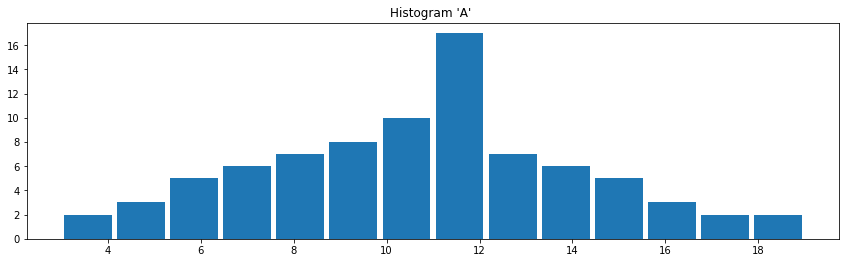

In [43]:
df.plot.hist("A", buckets=15)

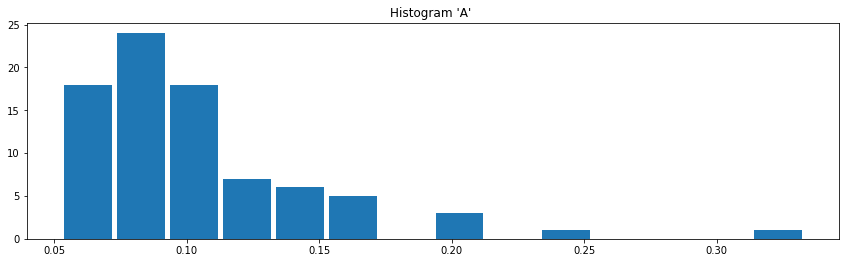

In [44]:
df.cols.reciprocal().plot.hist("A", buckets=15)

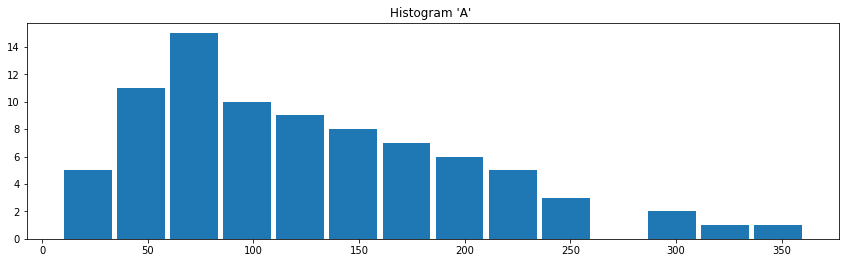

In [45]:
df.cols.pow().plot.hist("A", buckets=15)

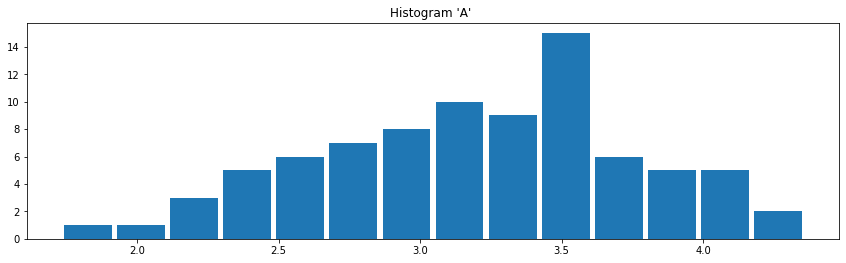

In [46]:
df.cols.sqrt().plot.hist("A", buckets=15)

## String to index, index to string

In [47]:
df = op.create.dataframe({
    "A": ["Optimus","Bumblebee","Eject","Optimus","Eject"]
})
df

A 1 (object)
Optimus
Bumblebee
Eject
Optimus
Eject


In [48]:
df = df.cols.string_to_index("A")
df

A 1 (object),A_string_to_index 2 (int32)
Optimus,2
Bumblebee,0
Eject,1
Optimus,2
Eject,1


In [49]:
df.cols.index_to_string("A_string_to_index", "A2")

A 1 (object),A_string_to_index 2 (int32),A2 3 (object)
Optimus,2,Optimus
Bumblebee,0,Bumblebee
Eject,1,Eject
Optimus,2,Optimus
Eject,1,Eject


## One-hot encoding

In [50]:
df = op.create.dataframe({
    "A":["Optimus","Bumblebee","Eject", "Megatron"],
    "B":["Transformer","Transformer","Transformer","Decepticon"]
})
df

A 1 (object),B 2 (object)
Optimus,Transformer
Bumblebee,Transformer
Eject,Transformer
Megatron,Decepticon


In [51]:
df.encoding.one_hot_encoder("B")

A 1 (object),B 2 (object),B_Decepticon 3 (uint8),B_Transformer 4 (uint8)
Optimus,Transformer,0,1
Bumblebee,Transformer,0,1
Eject,Transformer,0,1
Megatron,Decepticon,1,0


## Feature Split 

In [52]:
df = op.create.dataframe({"A":["Argenis Leon","Luis Aguirre","Favio Vasquez",op.nan]})

In [53]:
df.cols.unnest("A"," ", drop=True)

A_0 1 (object),A_1 2 (object)
Argenis,Leon
Luis,Aguirre
Favio,Vasquez
nan,None


In [54]:
df = op.create.dataframe({"A":["10/04/1980","20/05/1995","01/08/1990",op.nan]})

In [55]:
df.cols.unnest("A", "/", splits=3, output_cols=["day","month","year"])

A 1 (object),day 2 (object),month 3 (object),year 4 (object)
10/04/1980,10,04,1980
20/05/1995,20,05,1995
01/08/1990,01,08,1990
nan,nan,None,None


## Scaling

In [56]:
df = op.create.dataframe({"A":[1.12,3.2,4.35,6.3,7.3,op.nan]})

In [57]:
df.cols.min_max_scaler("*")

A 1 (float64)
0.0
0.3365695792880259
0.5226537216828478
0.8381877022653721
1.0
nan


In [58]:
df.cols.standard_scaler("*")

A 1 (float64)
-1.5152566984054119
-0.5699255848231511
-0.04726655567911307
0.8389813633042563
1.2934674756034201
nan


In [59]:
df.cols.max_abs_scaler("*")

A 1 (float64)
0.15342465753424658
0.4383561643835617
0.595890410958904
0.863013698630137
1.0
nan
